# classification between  male and female
<B> in this dataset,I have chosen to deal with the gender classification of human beings based on facial structure. 

In [125]:
import numpy as np 
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt 
from numpy import cov

In [126]:
person=pd.read_csv('/Users/ortal/Desktop/OneDrive - Ariel University/שיעורים/AI/proiect/dataset/gender_classification_v7.csv')
person


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


<B> Explanation of features

<b>long hair:</b> boolean features. if the hair is short=0, if it's long=1.\
<b>forehead_width_cm:</b> the width of the forehead in cm.\
<b>forehead_height_cm:</b>the hught of the forehead in cm.\
<b>nose_wide:</b>boolean features. if the nose is wide=1, if it's thin=0.\
<b>nose_long:</b>boolean features. if the nose is short=0, if it's long=1.\
<b>lips_thin:</b>boolean features. if the lips are thin =1, if they width=0.\
<b>distance_nose_to_lip_long:</b> boolean features. if the distance between the nose and the lip is short=0, if it's long=1.\
gender: male or female\

<B>Note - I did not find according to what the ratio is defined as long and short, and therefore please assume that it was defined after a general average calculation of the relevant parameters in the population 

    
    

In [133]:
#  check if there is null, get basic information about the data
person.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
 8   gender_code                5001 non-null   int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 351.8+ KB


<b>There is 5000 raws and 8 columns. 
There is no null values in this dataFrame<b>
    


# Gender
* Note that "gender" is categorical feature, so we  change it to numerical (after we show the data):
males=0 females=1:

In [141]:
person.gender_code.value_counts()

1    2501
0    2500
Name: gender_code, dtype: int64

<B>We can see that there is 2501 sumples of males and 2500 sumples of females.



* The average of each gender:

In [146]:
gender1=person.groupby(['gender']).mean()
gender1

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender_code
gender,,,,,,,,
Female,0.873251,12.811675,5.796321,0.114754,0.135946,0.121551,0.121551,1.0
Male,0.866000,13.551440,6.096360,0.873200,0.880000,0.864800,0.876400,0.0


In [139]:
person['gender_code']=pd.factorize(person.gender)[0]
person.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,gender_code
0,1,11.8,6.1,1,0,1,1,Male,0
1,0,14.0,5.4,0,0,1,0,Female,1
2,0,11.8,6.3,1,1,1,1,Male,0
3,0,14.4,6.1,0,1,1,1,Male,0
4,1,13.5,5.9,0,0,0,0,Female,1


להגדיר יותר טוב את ציר הוואי לפי הפרמטקים הנכונים ןלהצליח לסדר את הגודל של הגרף כך שהמקרא יתאים.

<Figure size 1440x1440 with 0 Axes>

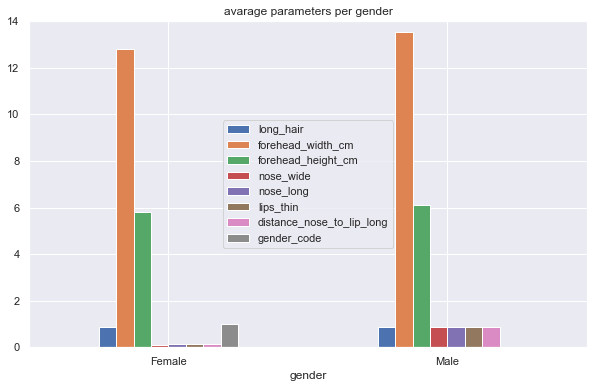

In [150]:
from matplotlib.ticker import FuncFormatter
plt.figure(figsize=(20,20))

gender2=gender1.plot(kind='bar',figsize=(10,6))
for item in gender2.get_xticklabels():
    item.set_rotation(0)


plt.ylim(0.0, 14.0)
plt.legend(loc='center')



plt.title('avarage parameters per gender')

plt.show()

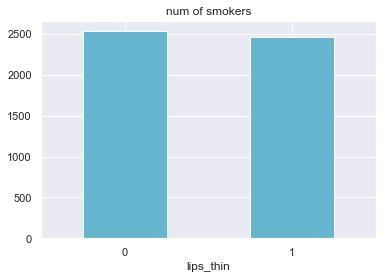

lips_thin
0    2535
1    2466
Name: gender, dtype: int64

In [164]:
lips1=person.groupby('lips_thin').gender.count().plot(kind='bar', title="num of smokers", color="c")
for item in lips1.get_xticklabels():
    item.set_rotation(0)
plt.show()
person.groupby('lips_thin').gender.count()

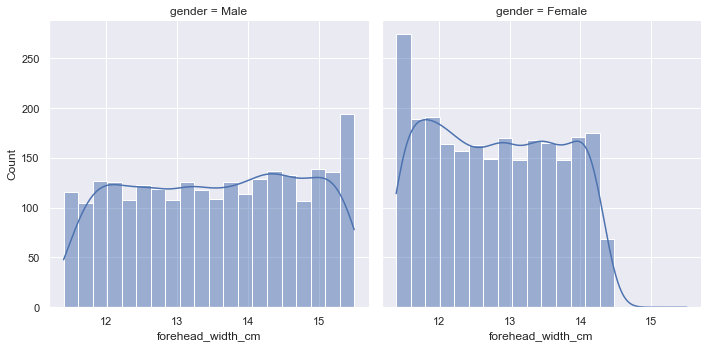

In [167]:
sns.displot(data=person, x="forehead_width_cm", col="gender",kde=True, color='b' )

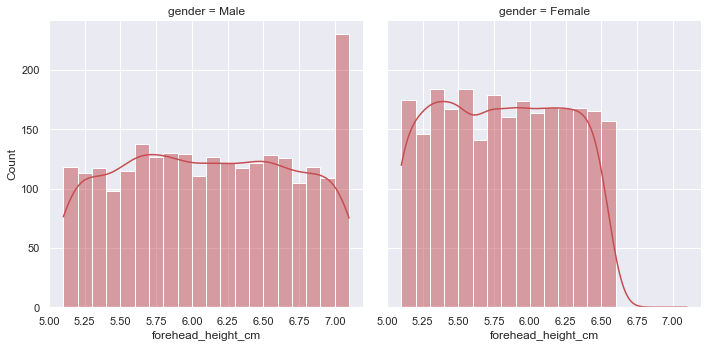

In [170]:
sns.displot(data=person, x="forehead_height_cm", col="gender",kde=True, color='r' )

* we can see that males has more wide and high forehead than females.

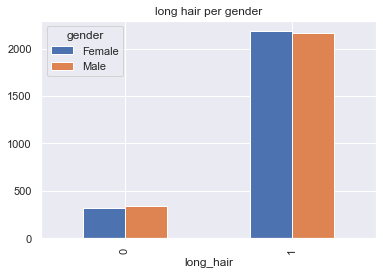

In [81]:
person.groupby(['long_hair','gender']).size().unstack().plot(kind='bar')

plt.title('long hair per gender')
plt.show()

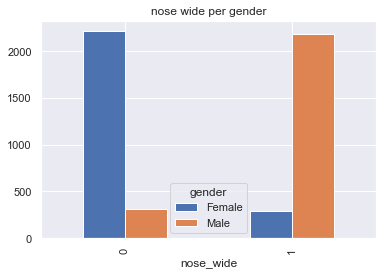

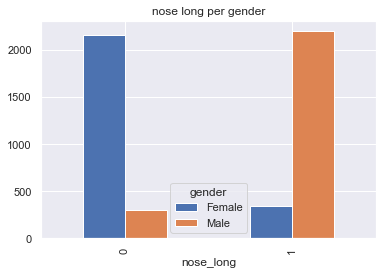

In [65]:
person.groupby(['nose_wide','gender']).size().unstack().plot(kind='bar')
plt.title('nose wide per gender')
person.groupby(['nose_long','gender']).size().unstack().plot(kind='bar')
plt.title('nose long per gender')
plt.show()

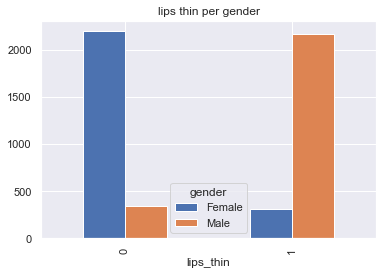

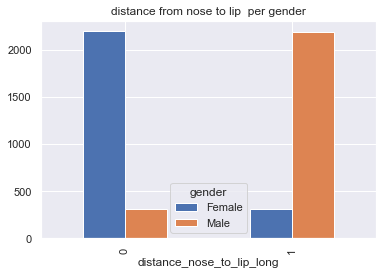

In [66]:
person.groupby(['lips_thin','gender']).size().unstack().plot(kind='bar')
plt.title('lips thin per gender')
person.groupby(['distance_nose_to_lip_long','gender']).size().unstack().plot(kind='bar')
plt.title('distance from nose to lip  per gender')
plt.show()

let see the coroolation between the parameters :

In [67]:
person.drop(['gender'],axis=1 ,inplace = True)

Text(0.5, 1.0, 'Correlation between facial features')

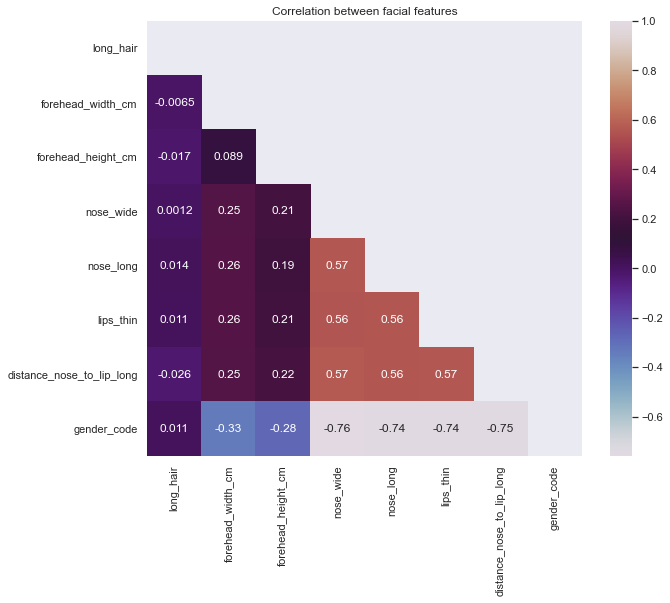

In [68]:
mask = np.zeros_like(person.corr())
mask[np.tril_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 8))
corr = person.corr()
sns.heatmap(corr, vmax=1,annot=True,cmap='twilight', mask=mask.T,square=True)

plt.title('Correlation between facial features')

## * we can see that there is a negative correlation between gender and nose wide, nose long, lips thin and  distance nose to lip. 
## * there is a low positive correlation between the parameters of the nose and lips. 

train test split

In [72]:
y = person["gender_code"]
x = person.drop(["gender_code"], axis=1)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 42)

print("x_train : ",x_train)
print ('x train size is:' ,x_train.shape)
print ()
print("x_test : ",x_test)
print ('x test size is:' ,x_test.shape)
print ()
print("y_train : ",y_train)
print ('y train size is:' ,y_train.shape)
print ()
print("y_test : ",y_test)
print ('y test size is:' ,y_test.shape)
print ()
print(f'Size of Training set: {len(x_train), len(y_train)}')
print(f'Size of Test set {len(x_test), len(y_test)}')

x_train :        long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
1088          1               14.0                 6.0          0          0   
479           1               12.6                 6.4          1          1   
727           1               13.1                 6.5          1          1   
3783          0               12.6                 6.8          1          1   
976           1               11.9                 5.7          0          0   
...         ...                ...                 ...        ...        ...   
4426          1               13.0                 6.5          0          0   
466           1               13.1                 5.5          0          0   
3092          1               12.0                 5.9          0          0   
3772          1               12.8                 5.4          0          0   
860           1               11.4                 5.5          0          0   

      lips_thin  distance_no

# Modeling
## knn:

### We will check in the range of 100 which accutacy we get with specific k, and get jast  the  accuracy above 0.97

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k_range = list(range(1, 100))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    # calculate accuracy
    mas=metrics.accuracy_score(y_test, y_pred)
    if mas>=0.97:
        print('for k=',k,'the accuracy is:', mas)

for k= 15 the accuracy is: 0.9705147426286856
for k= 17 the accuracy is: 0.9705147426286856
for k= 22 the accuracy is: 0.9700149925037481
for k= 23 the accuracy is: 0.9705147426286856
for k= 24 the accuracy is: 0.9710144927536232
for k= 25 the accuracy is: 0.9700149925037481
for k= 27 the accuracy is: 0.9705147426286856
for k= 28 the accuracy is: 0.9700149925037481
for k= 29 the accuracy is: 0.9710144927536232
for k= 31 the accuracy is: 0.9705147426286856
for k= 32 the accuracy is: 0.9710144927536232
for k= 33 the accuracy is: 0.9715142428785607
for k= 34 the accuracy is: 0.9715142428785607
for k= 35 the accuracy is: 0.9705147426286856
for k= 36 the accuracy is: 0.9705147426286856
for k= 37 the accuracy is: 0.9710144927536232
for k= 38 the accuracy is: 0.9715142428785607
for k= 39 the accuracy is: 0.9715142428785607
for k= 40 the accuracy is: 0.9705147426286856
for k= 41 the accuracy is: 0.9710144927536232
for k= 42 the accuracy is: 0.9710144927536232
for k= 43 the accuracy is: 0.97201

It can be seen that the maximum accuracy is about 0.97 so i check wich k gives that:


In [71]:
k_range = list(range(1, 100))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred_knn = knn.predict(x_test)
    mas=metrics.accuracy_score(y_test, y_pred_knn)
    if mas>=0.972:
        print('for k=',k,'the accuracy is:', mas)

for k= 43 the accuracy is: 0.9720139930034982
for k= 49 the accuracy is: 0.9720139930034982
for k= 95 the accuracy is: 0.9720139930034982
for k= 97 the accuracy is: 0.9720139930034982


we can see that all this k gives the same accuracy, **so the final accuraccy is 0.9720139930034982**

 I check if by  doing cross validaion, I can get a better performance:

In [22]:
from sklearn.model_selection import cross_val_score
# 10-fold cross-validation
knn = KNeighborsClassifier(n_neighbors=38)
print(cross_val_score(knn, x, y, cv=10, scoring='accuracy').mean())

0.9722087824351296


It can be seen that the accuracy is not much different from the accuracy in the "train test split" method, and therefore it is the maximum accuracy


lets calculate the confution metrics

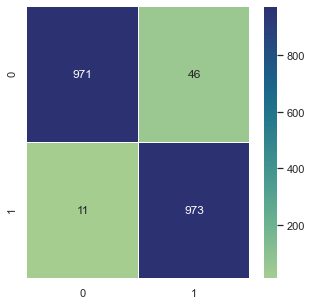

In [23]:
confusion = metrics.confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

f, ax = plt.subplots(figsize = (5,5))

sns.heatmap(confusion,annot = True, linewidth = 0.5, fmt = ".0f", ax = ax,cmap="crest")
plt.show()

In [24]:
print('Out of 2001 samples the model was right in',TP+TN,'of the samples and wrong in', FP+FN, 'sampels')
# how often is the classifier correct?
print('Classification Accuracy:',(TP + TN) / float(TP + TN + FP + FN))
#how often is the classifier incorrect?
print('Classification Error:',(FP + FN) / float(TP + TN + FP + FN))

Out of 2001 samples the model was right in 1944 of the samples and wrong in 57 sampels
Classification Accuracy: 0.9715142428785607
Classification Error: 0.02848575712143928


# roc curve

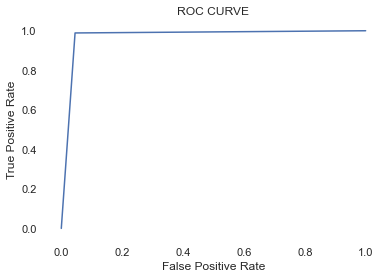

The score ROC Curve is: 97.2%


In [25]:
from sklearn.metrics import  roc_curve
from sklearn.metrics import roc_auc_score
false_positive_rate, true_positiv_rate, _= roc_curve(y_test, y_pred)
auc= roc_auc_score(y_test, y_pred)
plt.plot(false_positive_rate, true_positiv_rate, label="auc="+str(auc))
plt.box(False)
plt.title('ROC CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()
 
print(f"The score ROC Curve is: {round(auc,3)*100}%")



## Logistic Regassion, Random Forest and Decision Tree

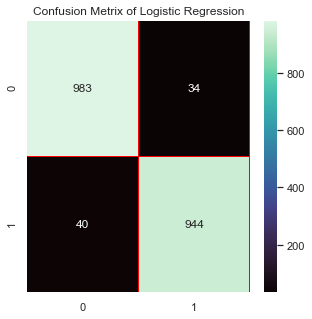

Out of 2001 samples the model was right in 1927 of the samples and wrong in 74 sampels
Classification Accuracy: 0.9630184907546226
Classification Error: 0.03698150924537731


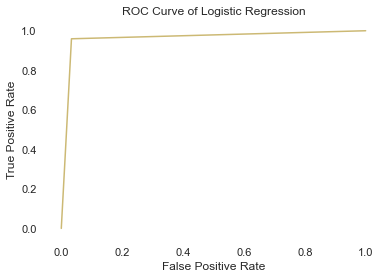

The score ROC Curve is: 96.3%


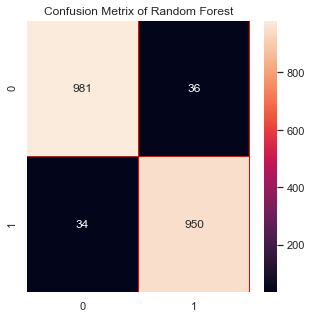

Out of 2001 samples the model was right in 1931 of the samples and wrong in 70 sampels
Classification Accuracy: 0.9650174912543729
Classification Error: 0.03498250874562719


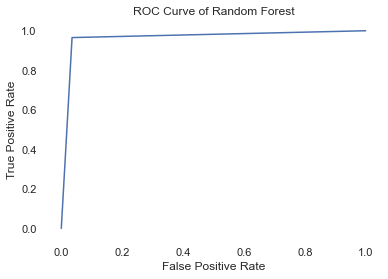

The score ROC Curve is: 96.5%


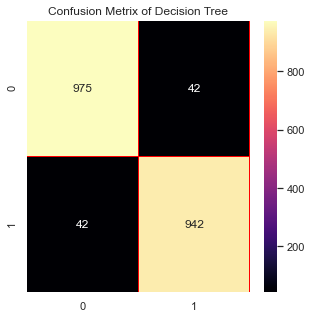

Out of 2001 samples the model was right in 1917 of the samples and wrong in 84 sampels
Classification Accuracy: 0.9580209895052474
Classification Error: 0.041979010494752625


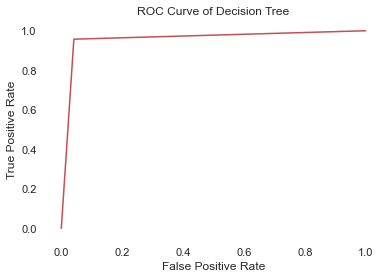

The score ROC Curve is: 95.8%


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
models = [LogisticRegression(),RandomForestClassifier(), DecisionTreeClassifier()]
model_names=['LogisticRegression','RandomForestClassifier','DecisionTree']
acc=[]
colors1=["mako","rocket","magma"]
colors2=["y","b","r"]
for model in range(3):
    clf=models[model]
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    #accuracy of each model
    acc.append(accuracy_score(pred,y_test))
    # confusion matrix
    cm = confusion_matrix(y_test, pred)
    f ,ax = plt.subplots(figsize = (5,5))
    sns.heatmap(cm, annot = True, linewidth = 0.5, linecolor = "red", fmt = ".0f", ax = ax, cmap=colors1[model])
    titels=['Logistic Regression','Random Forest','Decision Tree']
    plt.title("Confusion Metrix of "+titels[model])
    plt.show()
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    print('Out of 2001 samples the model was right in',TP+TN,'of the samples and wrong in', FP+FN, 'sampels')
    print('Classification Accuracy:',(TP + TN) / float(TP + TN + FP + FN))
    print('Classification Error:',(FP + FN) / float(TP + TN + FP + FN))
    #ROC
    false_positive_rate, true_positiv_rate, _= roc_curve(y_test, pred)
    auc= roc_auc_score(y_test, pred)
    plt.plot(false_positive_rate, true_positiv_rate, label="auc="+str(auc), color=colors2[model])
    plt.box(False)
    plt.title('ROC Curve of '+titels[model])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid(True)
    plt.show()
    print(f"The score ROC Curve is: {round(auc,3)*100}%")



## accuracy:



In [29]:
d={'Modelling':model_names,'Accuracy':acc}    
acc_frame=pd.DataFrame(d)
acc_frame



,Modelling,Accuracy
0,LogisticRegression,0.963018
1,RandomForestClassifier,0.965017
2,DecisionTree,0.958021


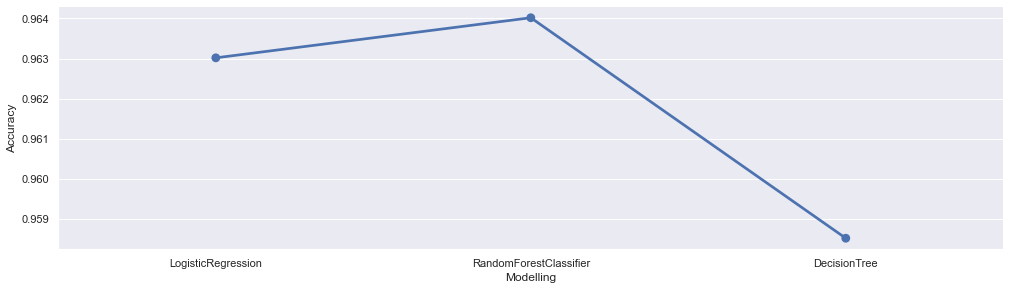

In [101]:
sns.catplot(x='Modelling',y='Accuracy',data=acc_frame,kind='point',height=4,aspect=3.5)

we can see that the hiest accuracy is of random forest classifier with 96% 

## dummy model:

In [26]:
from sklearn.dummy import DummyClassifier
  
dummy_clf = DummyClassifier(strategy="uniform")
dummy_clf.fit(x_train, y_train)

y_pred_dummy=dummy_clf.predict(x_test)
dummy_clf.score(y_test, y_pred_dummy)


0.5027486256871564